### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58


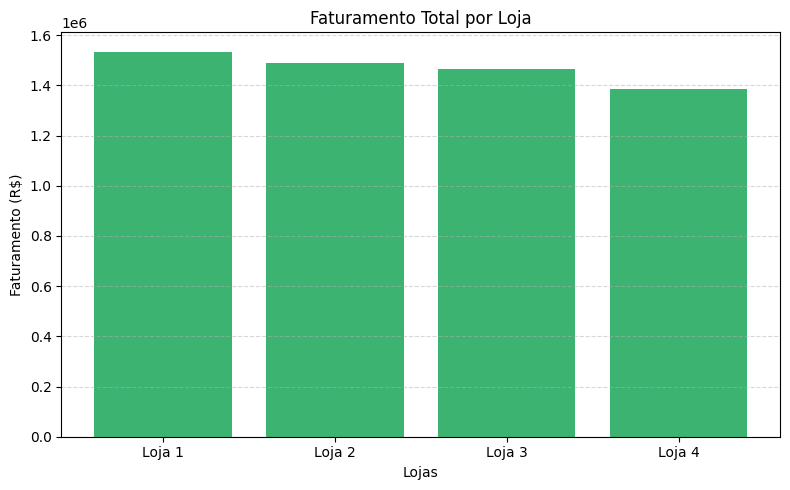

In [36]:
import matplotlib.pyplot as plt

# Faturamento total de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")

# Faturamento de cada loja
faturamento_lojas = [
    loja['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]

# Plotando gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], faturamento_lojas, color='mediumseagreen')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Lista com os dataframes das lojas
lojas = [loja, loja2, loja3, loja4]

# Calcular faturamento total de cada loja
fat_totais = [df['Preço'].sum() for df in lojas]

# Identificar maior faturamento e a loja correspondente
max_faturamento = max(fat_totais)
idx_max_fat = fat_totais.index(max_faturamento) + 1  # +1 para nomear Loja 1, 2, etc


# 2. Vendas por Categoria


📊 Quantidade de produtos vendidos por categoria:
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


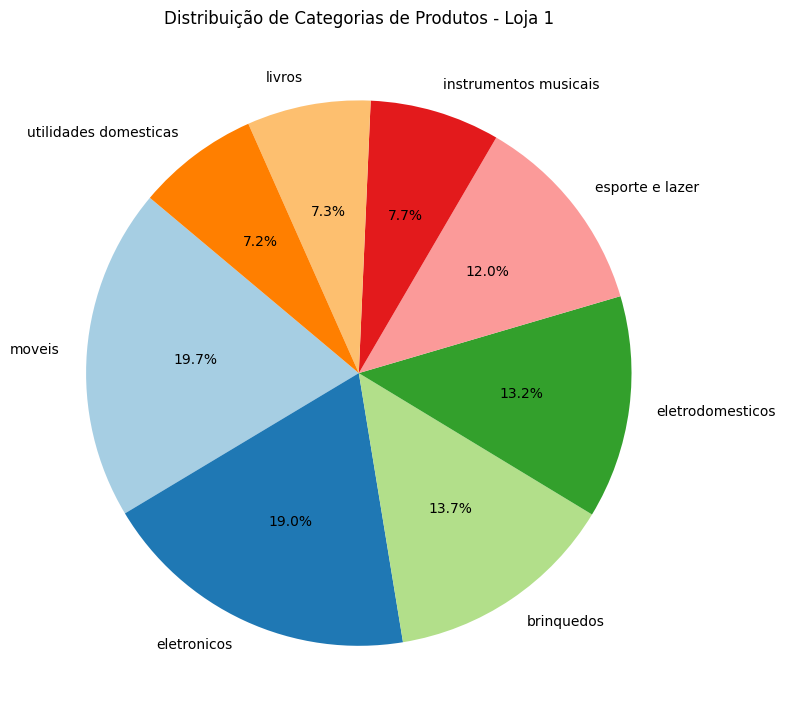

In [37]:
# Criando um DataFrame unificado com as contagens
tabela_categorias = pd.DataFrame({
    'Loja 1': loja['Categoria do Produto'].value_counts(),
    'Loja 2': loja2['Categoria do Produto'].value_counts(),
    'Loja 3': loja3['Categoria do Produto'].value_counts(),
    'Loja 4': loja4['Categoria do Produto'].value_counts()
})

# Preenchendo valores ausentes com 0 e ordenando pelas categorias da Loja 1
tabela_categorias = tabela_categorias.fillna(0).astype(int)
tabela_categorias = tabela_categorias.sort_values(by='Loja 1', ascending=False)

# Exibindo a tabela
print("📊 Quantidade de produtos vendidos por categoria:")
print(tabela_categorias)

# Pegando categorias da Loja 1
categorias_loja1 = loja['Categoria do Produto'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(categorias_loja1, labels=categorias_loja1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Categorias de Produtos - Loja 1')
plt.tight_layout()
plt.show()

categorias_mais = []
categorias_menos = []

for df in lojas:
    cont_cat = df['Categoria do Produto'].value_counts()
    categorias_mais.append(cont_cat.head(3).index.tolist())
    categorias_menos.append(cont_cat.tail(3).index.tolist())



# 3. Média de Avaliação das Lojas

In [39]:
# Calculando média das avaliações
media_loja1 = loja['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados com 2 casas decimais
print(f"Média de Avaliação - Loja 1: {media_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_loja4:.2f}")

medias_avaliacao = [df['Avaliação da compra'].mean() for df in lojas]
max_media = max(medias_avaliacao)
idx_max_media = medias_avaliacao.index(max_media) + 1


Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

📍 Loja 1
Mais vendido: Micro-ondas (60 vendas)
Menos vendido: Headset (33 vendas)
----------------------------------------
📍 Loja 2
Mais vendido: Iniciando em programação (65 vendas)
Menos vendido: Jogo de tabuleiro (32 vendas)
----------------------------------------
📍 Loja 3
Mais vendido: Kit banquetas (57 vendas)
Menos vendido: Blocos de montar (35 vendas)
----------------------------------------
📍 Loja 4
Mais vendido: Cama box (62 vendas)
Menos vendido: Guitarra (33 vendas)
----------------------------------------


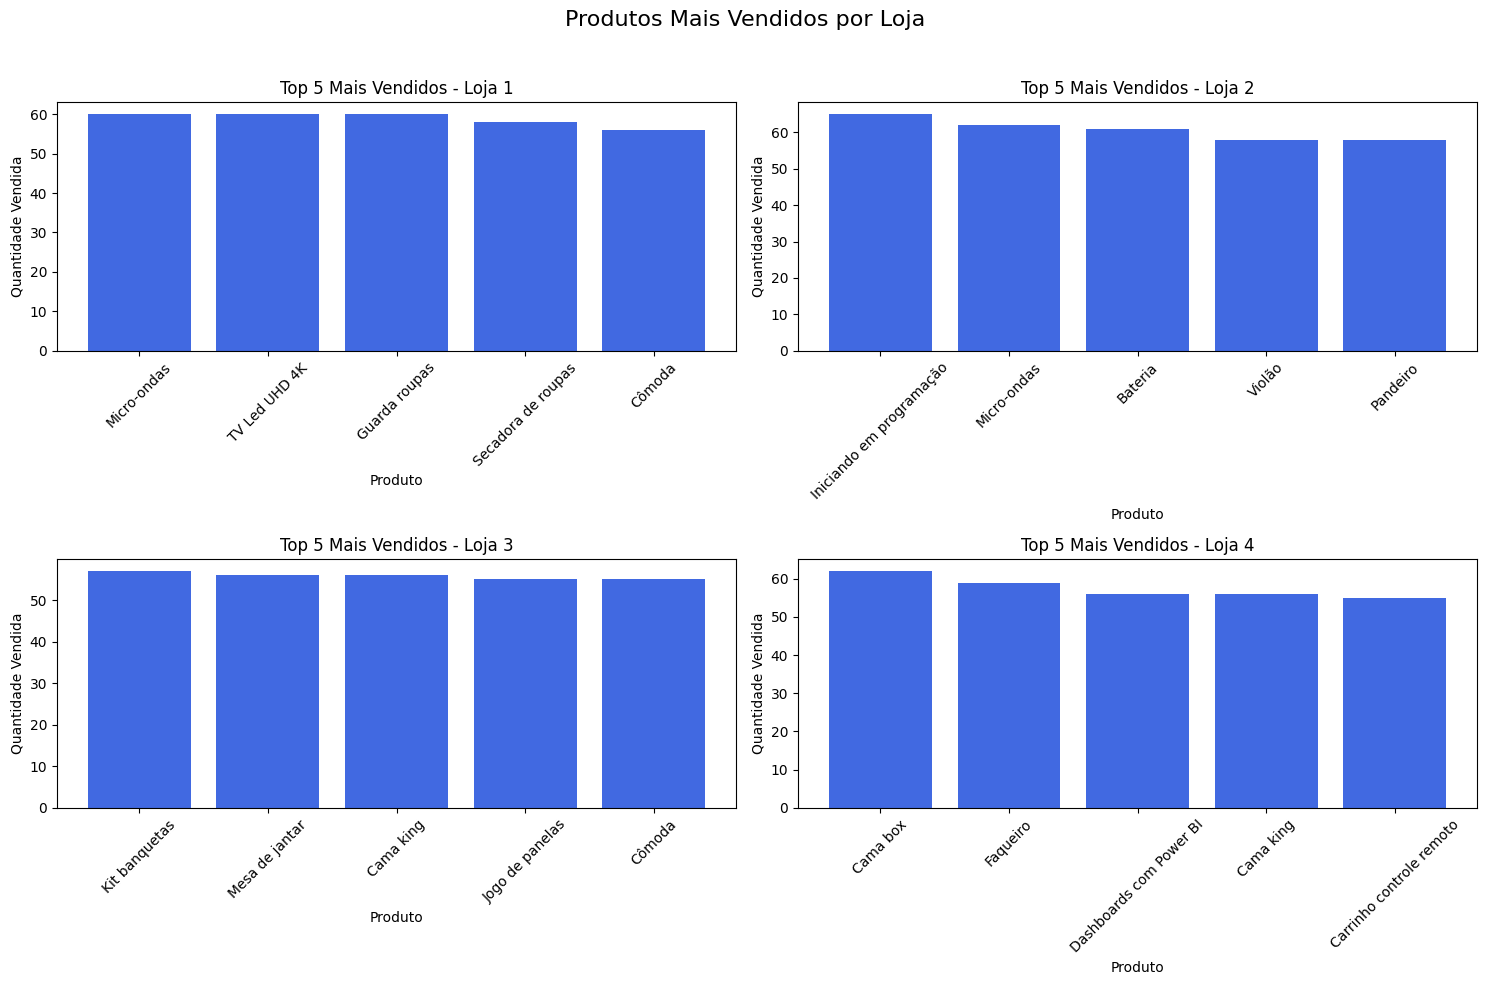

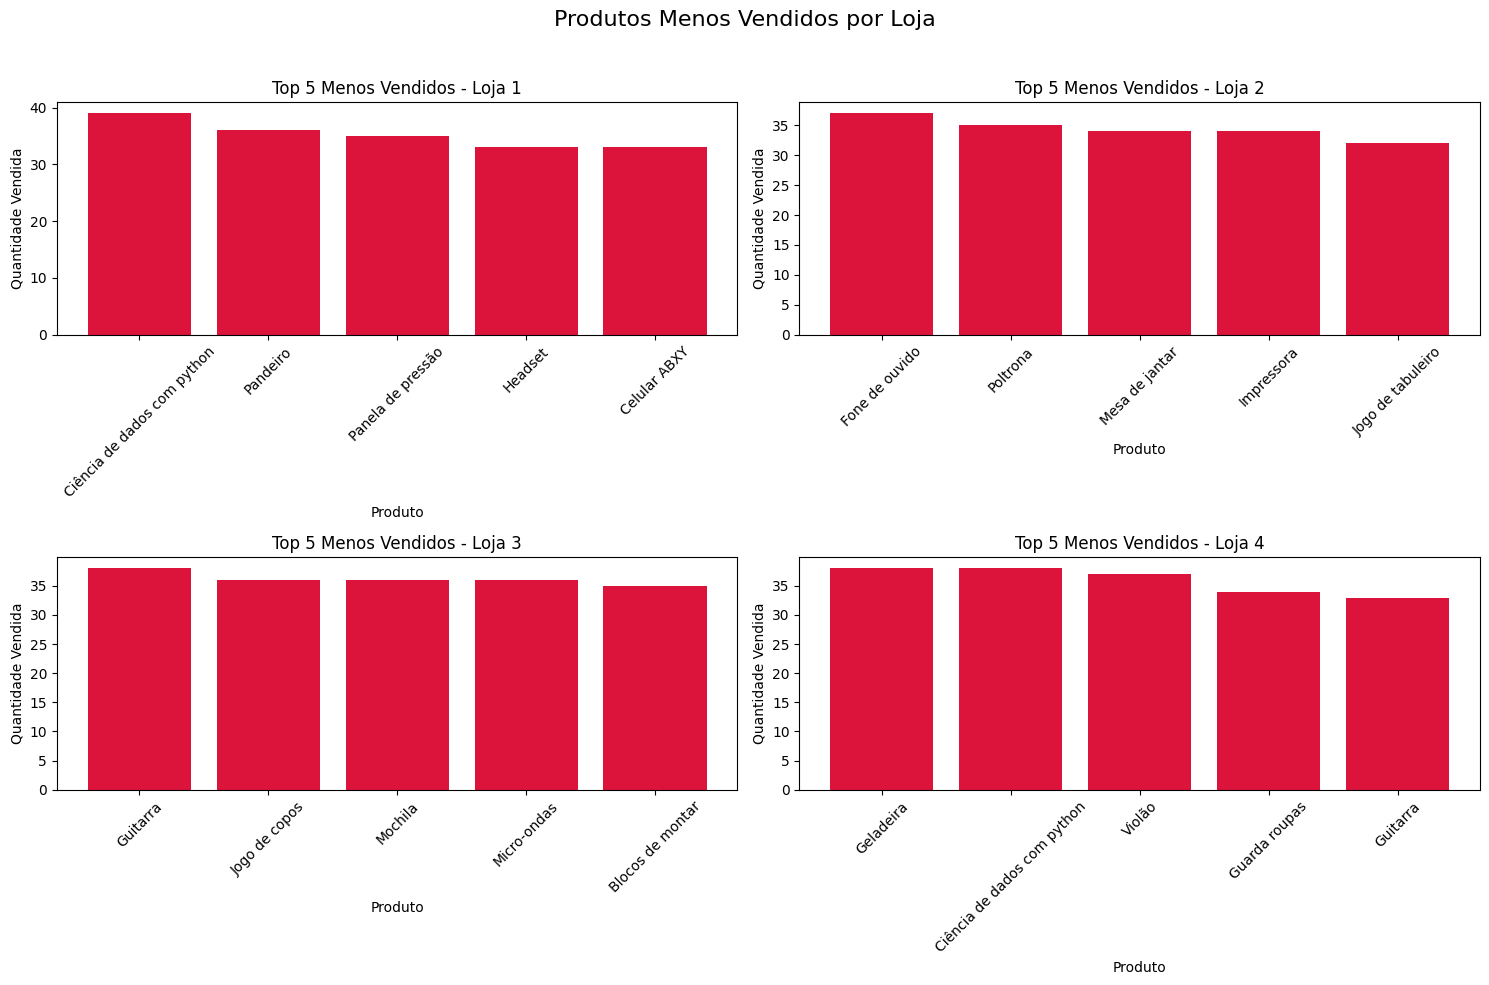

In [33]:
# Função para identificar mais e menos vendidos
def resumo_vendas(loja_df, nome_loja):
    contagem = loja_df['Produto'].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()
    qtd_mais = contagem.max()
    qtd_menos = contagem.min()

    print(f"📍 {nome_loja}")
    print(f"Mais vendido: {mais_vendido} ({qtd_mais} vendas)")
    print(f"Menos vendido: {menos_vendido} ({qtd_menos} venda{'s' if qtd_menos > 1 else ''})")
    print("-" * 40)

# Executando para cada loja
resumo_vendas(loja, "Loja 1")
resumo_vendas(loja2, "Loja 2")
resumo_vendas(loja3, "Loja 3")
resumo_vendas(loja4, "Loja 4")

import matplotlib.pyplot as plt

# Lista de DataFrames das lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# --- Gráfico Top 5 Mais Vendidos ---
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i in range(4):
    top_produtos = lojas[i]['Produto'].value_counts().head(5)

    axs[i].bar(top_produtos.index, top_produtos.values, color='royalblue')
    axs[i].set_title(f'Top 5 Mais Vendidos - {nomes_lojas[i]}')
    axs[i].set_xlabel('Produto')
    axs[i].set_ylabel('Quantidade Vendida')
    axs[i].tick_params(axis='x', rotation=45)

plt.suptitle('Produtos Mais Vendidos por Loja', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Gráfico Top 5 Menos Vendidos ---
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i in range(4):
    bottom_produtos = lojas[i]['Produto'].value_counts().tail(5)

    axs[i].bar(bottom_produtos.index, bottom_produtos.values, color='crimson')
    axs[i].set_title(f'Top 5 Menos Vendidos - {nomes_lojas[i]}')
    axs[i].set_xlabel('Produto')
    axs[i].set_ylabel('Quantidade Vendida')
    axs[i].tick_params(axis='x', rotation=45)

plt.suptitle('Produtos Menos Vendidos por Loja', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

produtos_mais = []
produtos_menos = []

for df in lojas:
    cont_prod = df['Produto'].value_counts()
    produtos_mais.append(cont_prod.head(3).index.tolist())
    produtos_menos.append(cont_prod.tail(3).index.tolist())


# 5. Frete Médio por Loja


In [31]:
# Calculando custo médio de frete por loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Exibindo os resultados com 2 casas decimais
print(f"Custo médio de frete - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Custo médio de frete - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Custo médio de frete - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Custo médio de frete - Loja 4: R$ {frete_medio_loja4:.2f}")

frete_medio = [df['Frete'].mean() for df in lojas]
menor_frete = min(frete_medio)
idx_menor_frete = frete_medio.index(menor_frete) + 1


Custo médio de frete - Loja 1: R$ 34.69
Custo médio de frete - Loja 2: R$ 33.62
Custo médio de frete - Loja 3: R$ 33.07
Custo médio de frete - Loja 4: R$ 31.28


# Relatório Final


In [40]:
relatorio = f"""
# Relatório Final — Análise das Lojas para Decisão de Venda

## 1. Introdução
O objetivo desta análise foi identificar qual das quatro lojas apresenta melhor desempenho para o Sr. João realizar suas vendas, considerando faturamento, categorias, avaliações, produtos vendidos e custo de frete.

## 2. Desenvolvimento

### 2.1 Faturamento Total das Lojas
- Loja 1: R$ {fat_totais[0]:,.2f}
- Loja 2: R$ {fat_totais[1]:,.2f}
- Loja 3: R$ {fat_totais[2]:,.2f}
- Loja 4: R$ {fat_totais[3]:,.2f}

A loja com maior faturamento foi a Loja {idx_max_fat} com R$ {max_faturamento:,.2f}.

### 2.2 Categorias de Produtos Mais e Menos Vendidas

Categorias mais vendidas (top 3) por loja:
- Loja 1: {', '.join(categorias_mais[0])}
- Loja 2: {', '.join(categorias_mais[1])}
- Loja 3: {', '.join(categorias_mais[2])}
- Loja 4: {', '.join(categorias_mais[3])}

Categorias menos vendidas (bottom 3) por loja:
- Loja 1: {', '.join(categorias_menos[0])}
- Loja 2: {', '.join(categorias_menos[1])}
- Loja 3: {', '.join(categorias_menos[2])}
- Loja 4: {', '.join(categorias_menos[3])}

### 2.3 Média das Avaliações dos Clientes
- Loja 1: {medias_avaliacao[0]:.2f}
- Loja 2: {medias_avaliacao[1]:.2f}
- Loja 3: {medias_avaliacao[2]:.2f}
- Loja 4: {medias_avaliacao[3]:.2f}

A loja com maior avaliação média foi a Loja {idx_max_media}.

### 2.4 Produtos Mais e Menos Vendidos

Produtos mais vendidos (top 3) por loja:
- Loja 1: {', '.join(produtos_mais[0])}
- Loja 2: {', '.join(produtos_mais[1])}
- Loja 3: {', '.join(produtos_mais[2])}
- Loja 4: {', '.join(produtos_mais[3])}

Produtos menos vendidos (bottom 3) por loja:
- Loja 1: {', '.join(produtos_menos[0])}
- Loja 2: {', '.join(produtos_menos[1])}
- Loja 3: {', '.join(produtos_menos[2])}
- Loja 4: {', '.join(produtos_menos[3])}

### 2.5 Custo Médio de Frete

- Loja 1: R$ {frete_medio[0]:,.2f}
- Loja 2: R$ {frete_medio[1]:,.2f}
- Loja 3: R$ {frete_medio[2]:,.2f}
- Loja 4: R$ {frete_medio[3]:,.2f}

A loja com menor custo médio de frete foi a Loja {idx_menor_frete}.

## 3. Conclusão e Recomendação

Após analisar todos os fatores, a Loja {idx_max_fat} se destaca pelo maior faturamento e boas avaliações, além de categorias populares alinhadas à demanda do mercado.

Considerando o equilíbrio entre faturamento, satisfação do cliente e custo de frete, recomendamos que o Sr. João opte pela Loja {idx_max_fat} para suas vendas, buscando maximizar o potencial de receita e fidelização.
"""

print(relatorio)



# Relatório Final — Análise das Lojas para Decisão de Venda

## 1. Introdução
O objetivo desta análise foi identificar qual das quatro lojas apresenta melhor desempenho para o Sr. João realizar suas vendas, considerando faturamento, categorias, avaliações, produtos vendidos e custo de frete.

## 2. Desenvolvimento

### 2.1 Faturamento Total das Lojas
- Loja 1: R$ 1,534,509.12
- Loja 2: R$ 1,488,459.06
- Loja 3: R$ 1,464,025.03
- Loja 4: R$ 1,384,497.58

A loja com maior faturamento foi a Loja 1 com R$ 1,534,509.12.

### 2.2 Categorias de Produtos Mais e Menos Vendidas

Categorias mais vendidas (top 3) por loja:
- Loja 1: moveis, eletronicos, brinquedos
- Loja 2: moveis, eletronicos, brinquedos
- Loja 3: moveis, eletronicos, brinquedos
- Loja 4: moveis, eletronicos, brinquedos

Categorias menos vendidas (bottom 3) por loja:
- Loja 1: instrumentos musicais, livros, utilidades domesticas
- Loja 2: instrumentos musicais, livros, utilidades domesticas
- Loja 3: livros, instrumentos musicai